# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
#1.1 The Price variable was cleaned by removing commas that appear in prices above 999 and converting the values to numeric. 
# Invalid entries were coerced to missing values. This ensures that prices are correctly interpreted as numeric.

import pandas as pd
import numpy as np

airbnb = pd.read_csv(
    "/workspace/undergrad_ml/data/airbnb_NYC.csv",
    encoding="latin1"
)

airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
)

airbnb["Price_clean"] = pd.to_numeric(
    airbnb["Price_clean"], errors="coerce"
)

airbnb["Price_clean"].isna().sum()

np.int64(0)

In [ ]:
#1.2 There is a substantial proportion of missing values in the subject_injury variable, which indicates whether the subject was injured 
# during police use of force incidents. The missingness is not random, as it is more likely to be missing for certain types of force used.
mn = pd.read_csv("/workspace/undergrad_ml/data/mn_police_use_of_force.csv")

mn["subject_injury_clean"] = mn["subject_injury"].map({
    "Yes": "Yes",
    "No": "No"
})

missing_prop = mn["subject_injury_clean"].isna().mean()

pd.crosstab(
    mn["subject_injury_clean"].fillna("Missing"),
    mn["force_type"]
)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [11]:
#1.3
metabric = pd.read_csv("/workspace/undergrad_ml/data/metabric.csv")

metabric["survival_binary"] = metabric["Overall Survival Status"].map({
    "Deceased": 0,
    "Living": 1
})

In [ ]:
#1.4 This code imputes missing values in the Review Scores Rating variable of the Airbnb dataset with the median rating. 
#This bias might negatively impact my results because when there are so many missing values imacting the median score it could have
#a negative impact on the legitimacy of any analysis or model built using this data.
missing_reviews = airbnb["Review Scores Rating"].isna().sum()

median_rating = airbnb["Review Scores Rating"].median()

airbnb["Review_Score_imputed"] = airbnb["Review Scores Rating"].fillna(
    median_rating
)

print(missing_reviews)
print(median_rating)

8323
94.0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [3]:
#2.1 It is an excel file so you have to use pd.read_excel()
import pandas as pd

sharks = pd.read_excel(
    "/workspace/undergrad_ml/data/sharks.xls"
)

sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#2.2 
sharks = sharks.dropna(axis=1, how="all")

2.3 An observation is a single shark attack incident. This matters because cleaning decisions (like dropping rows) should preserve individual attack records rather than mixing or aggregating events.

<Axes: xlabel='Year'>

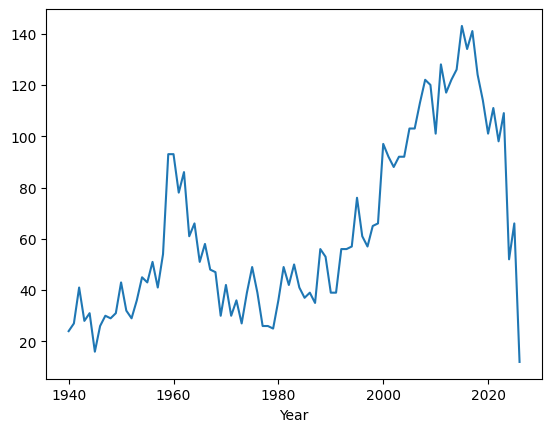

In [5]:
#2.4
sharks["Year"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks_1940 = sharks[sharks["Year"] >= 1940]

sharks_1940["Year"].value_counts().sort_index().plot()

Years range from the early 1800s to recent years. Since 1940, recorded shark attacks generally increase over time, likely due to improved reporting and population growth.

<Axes: >

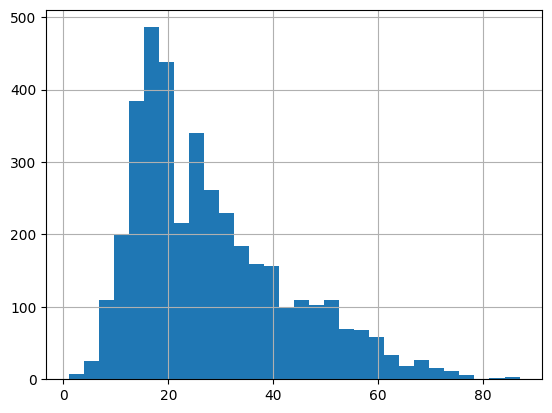

In [6]:
#2.5 
sharks["Age"] = pd.to_numeric(sharks["Age"], errors="coerce")
sharks["Age"].hist(bins=30)

In [7]:
#2.6
sharks["Type_clean"] = sharks["Type"].replace({
    "Provoked": "Provoked",
    "Unprovoked": "Unprovoked"
}).fillna("Unknown")

(sharks["Type_clean"] == "Unprovoked").mean()

np.float64(0.738620299689002)

In [ ]:
#2.7
sharks.columns = sharks.columns.str.strip().str.lower()

sharks["fatal_clean"] = (
    sharks["fatal y/n"]
    .astype(str)
    .str.strip()
    .str.upper()
    .replace({"Y": "Y", "N": "N"})
    .replace({"NAN": "Unknown"})
)

sharks["fatal_clean"].value_counts()

fatal_clean
N          4942
Y          1489
Unknown     561
UNKNOWN      71
F             5
M             3
NQ            1
2017          1
Y X 2         1
Name: count, dtype: int64

2.8: Unprovoked attacks are more likely to be fatal than provoked ones. This makes sense as I would imagine provoked attacks are usually more human controlled.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

3.1: The paper explains a standard way to structure datasets so they are easier to clean, analyze, model, and visualize by aligning data structure with meaning
3.2: The tidy data standard aims to reduce friction in analysis by providing a consistent data structure that works seamlessly across tools, letting analysts focus on the problem rather than data formatting
3.3: The first quote means tidy datasets share a common structure, while messy datasets vary in many unpredictable ways; the second means that although observations and variables feel intuitive in specific datasets, defining them precisely in general is surprisingly hard
3.4: Wickham defines values as individual data points, variables as measurements of the same attribute across units, and observations as all measurements taken on a single unit
3.5: Tidy data is defined by three rules: each variable is a column, each observation is a row, and each type of observational unit is stored in its own table
3.6: The five common problems are: column headers as values, multiple variables in one column, variables in rows and columns, multiple observational units in one table, and one unit spread across tables; Table 4 is messy because income values are stored as column headers, and “melting” converts those columns into rows to make variables explicit
3.7: Table 11 is messy because variables (day and temperature type) are embedded in both rows and columns, while Table 12 is tidy and “molten” because each row represents a single day with one column per variable

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [13]:
#4.1
import pandas as pd
import matplotlib.pyplot as plt

fg = pd.read_csv("/workspace/undergrad_ml/data/ForeignGifts_edu.csv")
fg.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


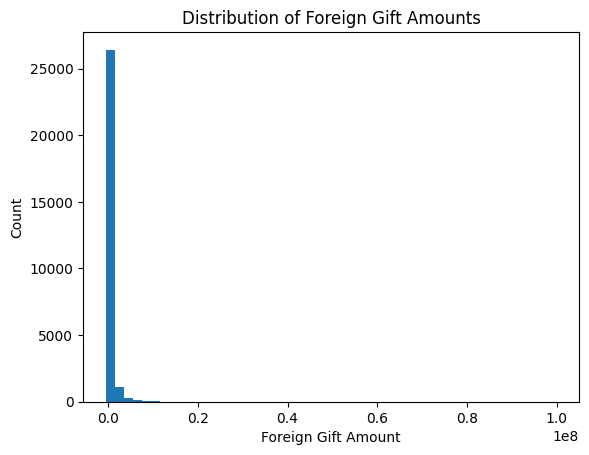

In [14]:
#4.2
fg["Foreign Gift Amount"] = pd.to_numeric(
    fg["Foreign Gift Amount"], errors="coerce"
)

plt.hist(fg["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

4.2: The distribution of foreign gift amounts is highly right-skewed, with many small gifts and a few extremely large ones. This indicates that total funding is dominated by a small number of very large transfers.

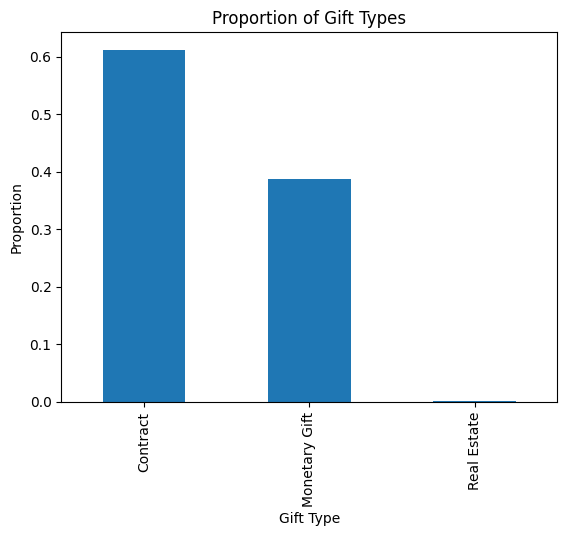

In [15]:
#4.3
gift_counts = fg["Gift Type"].value_counts(normalize=True)
gift_counts

gift_counts.plot(kind="bar")
plt.ylabel("Proportion")
plt.title("Proportion of Gift Types")
plt.show()

4.3: about 60% of the gifts are contracts, about 40% of the gifts are monetary, and the small remaining percentage is real estate. 

In [19]:
#4.4
top_countries_count = (
    fg.groupby("Country of Giftor")
      .size()
      .sort_values(ascending=False)
      .head(15)
)

top_countries_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

In [20]:
top_countries_amount = (
    fg.groupby("Country of Giftor")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_countries_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [23]:
#4.5
top_institutions = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(15)
)

top_institutions


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

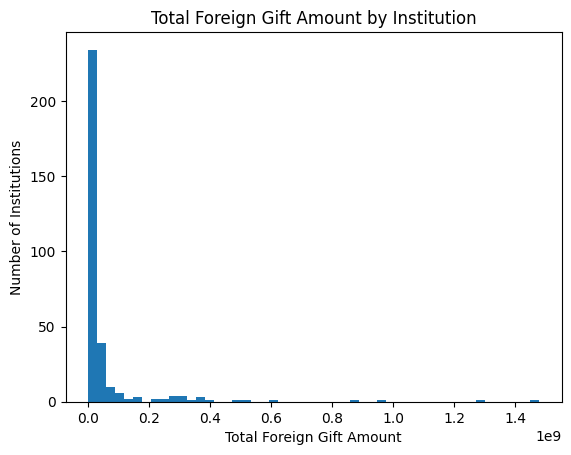

In [24]:
institution_totals = (
    fg.groupby("Institution Name")["Foreign Gift Amount"]
      .sum()
)

plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Number of Institutions")
plt.title("Total Foreign Gift Amount by Institution")
plt.show()

In [26]:
top_giftors = (
    fg.groupby("Giftor Name")["Foreign Gift Amount"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [28]:
#5.1

cc = pd.read_csv("/workspace/undergrad_ml/data/college_completion.csv")

In [29]:
#5.2
cc.shape
cc.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [30]:
#5.3
pd.crosstab(cc["control"], cc["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


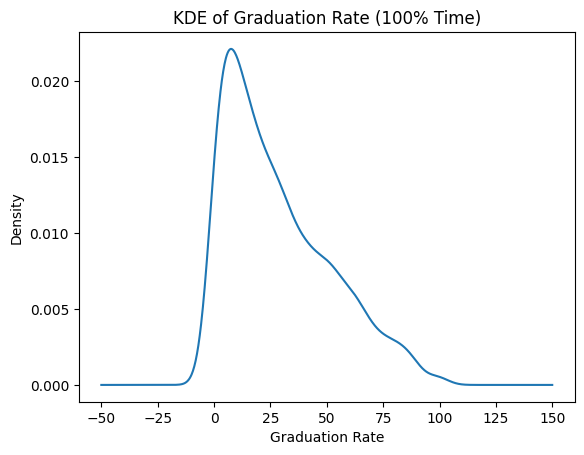

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

In [31]:
#5.4
cc["grad_100_value"].plot(kind="kde")
plt.title("KDE of Graduation Rate (100% Time)")
plt.xlabel("Graduation Rate")
plt.show()

cc["grad_100_value"].describe()

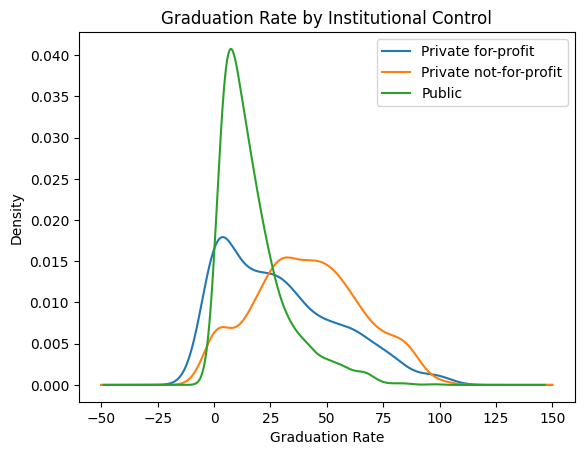

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [32]:
for ctrl, group in cc.groupby("control"):
    group["grad_100_value"].plot(kind="kde", label=ctrl)

plt.legend()
plt.title("Graduation Rate by Institutional Control")
plt.xlabel("Graduation Rate")
plt.show()

cc.groupby("control")["grad_100_value"].describe()

Private not-for-profit institutions show the highest and most concentrated graduation rates, while public institutions exhibit wider variability and lower medians.

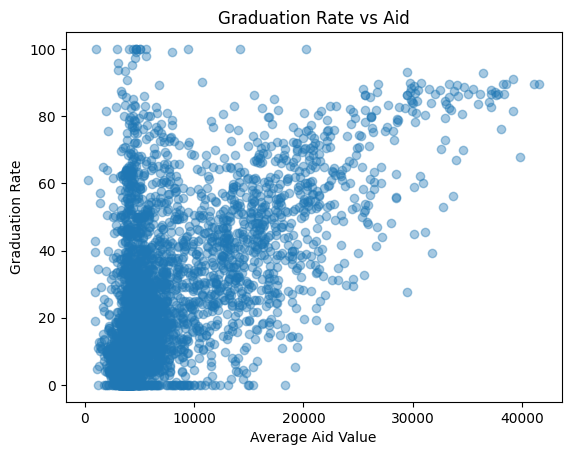

,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


In [33]:
#5.5
plt.scatter(cc["aid_value"], cc["grad_100_value"], alpha=0.4)
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Graduation Rate vs Aid")
plt.show()

cc[["aid_value", "grad_100_value"]].cov()
cc[["aid_value", "grad_100_value"]].corr()

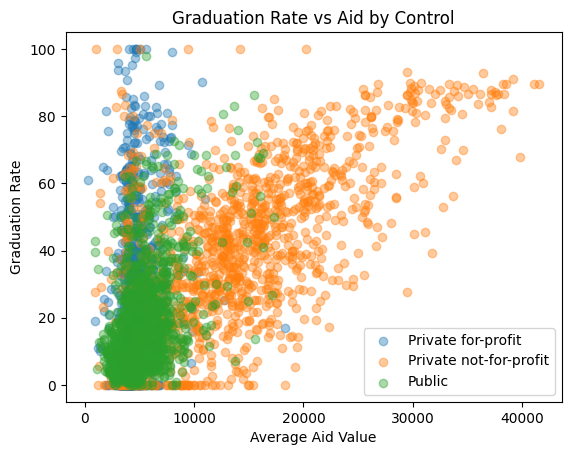

aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                       grad_100_value   0.601591        1.000000
Public                 aid_value        1.000000        0.482481
                       grad_100_value   0.482481        1.000000

In [34]:
for ctrl, group in cc.groupby("control"):
    plt.scatter(group["aid_value"], group["grad_100_value"], alpha=0.4, label=ctrl)

plt.legend()
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate")
plt.title("Graduation Rate vs Aid by Control")
plt.show()

cc.groupby("control")[["aid_value", "grad_100_value"]].corr()

Overall, higher aid is weakly positively correlated with graduation rates. The positive relationship is strongest for private not-for-profit institutions and weakest for public and for-profit schools.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

6.1:
$$
\begin{aligned}
m(a + bX)
&= \frac{1}{N}\sum_{i=1}^N (a + b x_i) \\
&= \frac{1}{N}\left(\sum_{i=1}^N a + b\sum_{i=1}^N x_i\right) \\
&= a + b\frac{1}{N}\sum_{i=1}^N x_i \\
&= a + b\,m(X).
\end{aligned}
$$


6.2:
$$
\begin{aligned}
\operatorname{cov}(X, X)
&= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(x_i - m(X)) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))^2 \\
&= s^2.
\end{aligned}
$$

6.3
$$
\begin{aligned}
\operatorname{cov}(X, a + bY)
&= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))\big((a + b y_i) - m(a + bY)\big) \\
&= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))\big(b(y_i - m(Y))\big) \\
&= b\,\operatorname{cov}(X, Y).
\end{aligned}
$$

6.4
$$
\begin{aligned}
\operatorname{cov}(a + bX, a + bY)
&= \frac{1}{N}\sum_{i=1}^N \big(b(x_i - m(X))\big)\big(b(y_i - m(Y))\big) \\
&= b^2\,\operatorname{cov}(X, Y).
\end{aligned}
$$

6.5
$$
\operatorname{med}(a + bX) = a + b\,\operatorname{med}(X),
\qquad
\operatorname{IQR}(a + bX) = b\,\operatorname{IQR}(X).
$$

6.6
$$
\mathbb{E}[X^2] \neq (\mathbb{E}[X])^2,
\qquad
\mathbb{E}[\sqrt{X}] \neq \sqrt{\mathbb{E}[X]}.
$$

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [35]:
#7.1
ames = pd.read_csv("/workspace/undergrad_ml/data/ames_prices.csv")
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


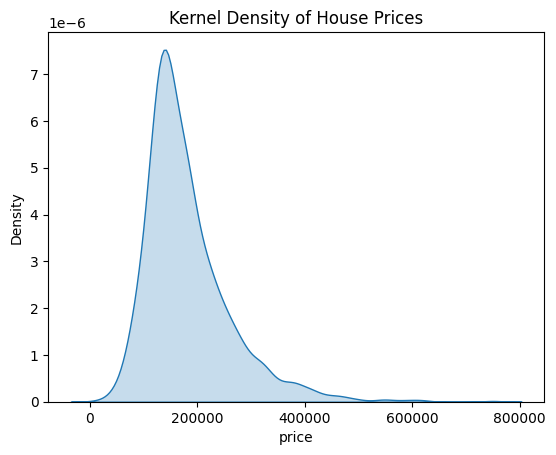

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [37]:
#7.2
import seaborn as sns

sns.kdeplot(ames["price"], fill=True)
plt.title("Kernel Density of House Prices")
plt.show()

ames["price"].describe()

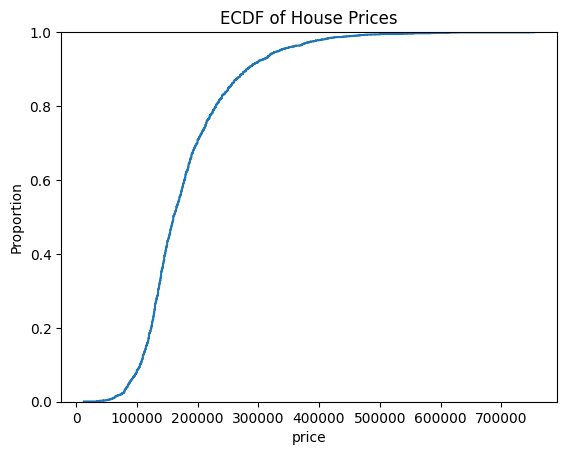

In [40]:
#7.3
sns.ecdfplot(data=ames, x="price")
plt.title("ECDF of House Prices")
plt.show()

In [41]:
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1.0])

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

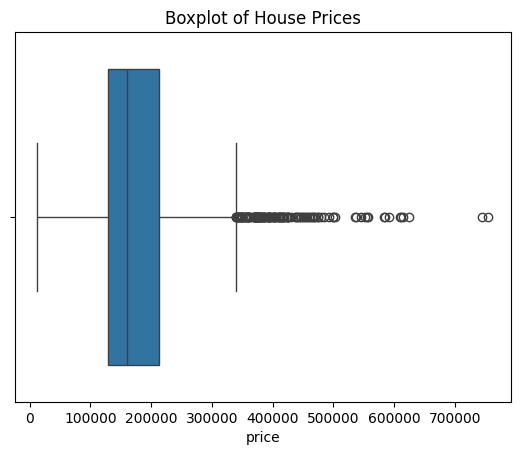

In [47]:
#7.4
sns.boxplot(x=ames["price"])
plt.title("Boxplot of House Prices")
plt.show()

There are multiple outliers at the high end of price.

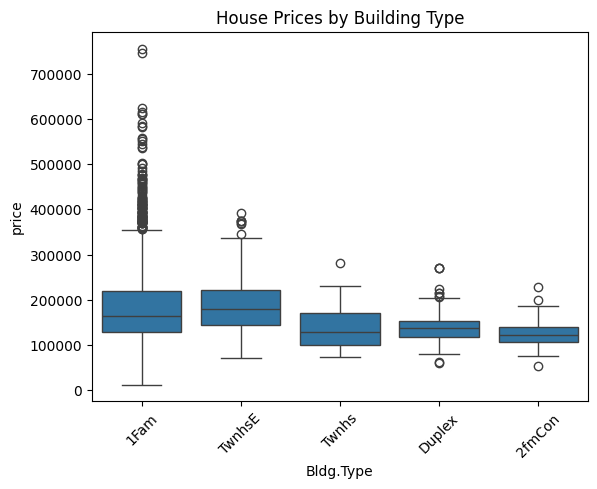

In [48]:
sns.boxplot(
    data=ames,
    x="Bldg.Type",
    y="price"
)
plt.title("House Prices by Building Type")
plt.xticks(rotation=45)
plt.show()

I notice that building type plays a large different and although means and ranges stay pretty consistent. 1Fam homes have many more outliers than the rest of the building types.

In [49]:
#7.5
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

ames["price_outlier"] = (
    (ames["price"] < lower_bound) | (ames["price"] > upper_bound)
).astype(int)

ames["price_outlier"].value_counts()

price_outlier
0    2793
1     137
Name: count, dtype: int64

In [50]:
#7.6
lower = ames["price"].quantile(0.01)
upper = ames["price"].quantile(0.99)

ames["price_winsor"] = ames["price"].clip(lower, upper)

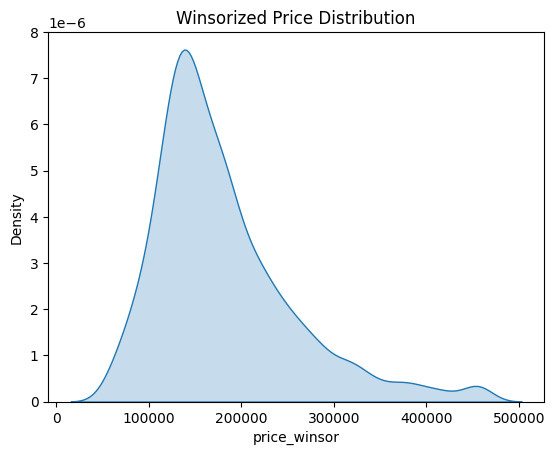

In [51]:
sns.kdeplot(data=ames, x="price_winsor", fill=True)
plt.title("Winsorized Price Distribution")
plt.show()

In [52]:
ames["price_winsor"].describe()

count      2930.000000
mean     180091.154334
std       75842.579174
min       61756.070000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      456666.370000
Name: price_winsor, dtype: float64

The right tail is reduced and allows for a smoother more uniform distribution.The mean and standard deviation decrease, indicating that extreme outliers previously had a strong influence on the distribution.